<a href="https://colab.research.google.com/github/hadeelbjs/IT326Project/blob/main/JupyterNotebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Obesity Level Prediction

# 1. Goal of Collecting the Dataset
The goal of this dataset is to predict an individual's obesity level based on various personal, dietary, and lifestyle attributes. Machine learning models can analyze these factors to classify individuals into different obesity categories, such as normal weight, overweight, or obese.

# 2. Source of the Dataset
The dataset is from https://www.kaggle.com/datasets/fatemehmehrparvar/obesity-levels.

## 3. General Information about the Dataset

- Number of Objects (Rows): 2,111
- Number of Attributes (Columns): 17
- *Types of Attributes*:
  - Numerical: 8 columns (e.g., Age, Height, Weight)
  - Categorical: 9 columns (e.g., Gender, Smoking, Obesity Level)
    
- **Class Name/Label**: The `NObeyesdad` column represents the obesity level, which includes categories like:
  - Normal Weight
  - Overweight Level I
  - Overweight Level II
  - Obesity Type I
  - Obesity Type II

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import MinMaxScaler ,LabelEncoder, StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression


warnings.filterwarnings("ignore", category=FutureWarning)



url = 'https://github.com/hadeelbjs/IT326Project/raw/8e3e300840eedb97e5b4a336af50f9feb3fcd103/Dataset/ObesityDataSet_raw_and_data_sinthetic.csv'
df = pd.read_csv(url)


In [ ]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   float64
 1   Gender                          2111 non-null   object 
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   CALC                            2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   SCC                             2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  family_history_with_overweight  2111 non-null   object 
 12  FAF                             21

In [ ]:
def highest_frequency_value(df, column_name):
    """
    This function returns the value with the highest frequency in the specified column
    along with its count.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    column_name (str): The name of the column to analyze.

    Returns:
    tuple: The value with the highest frequency and its count.
    """
    # Calculate frequency counts for the specified column
    frequency_counts = df[column_name].value_counts()

    # Get the value with the highest frequency
    highest_value = frequency_counts.idxmax()
    highest_count = frequency_counts.max()

    return highest_value, highest_count


### **Visulaizations :**

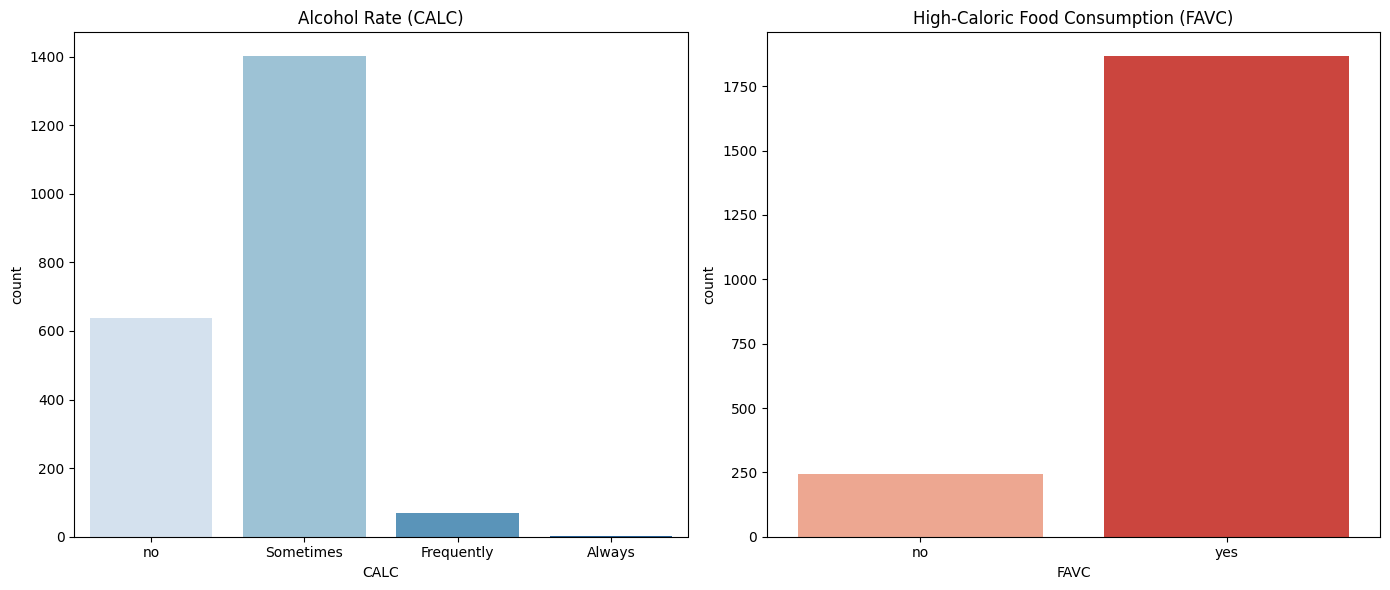

In [ ]:
# Create a figure with a specified size

plt.figure(figsize=(14, 6))

# Create the first subplot for alcohol rate distribution

plt.subplot(1, 2, 1) # 1 row, 2 columns, first subplot
sns.countplot(x='CALC', data=df, palette='Blues') # Count plot for 'CALC' variable with a blue palette
plt.title('Alcohol Rate (CALC)') # Set the title for the first subplot

# Create the second subplot for high-caloric food consumption distribution

plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
sns.countplot(x='FAVC', data=df, palette='Reds') # Count plot for 'FAVC' variable with a red palette
plt.title('High-Caloric Food Consumption (FAVC)')  # Set the title for the second subplot

# Adjust the layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()



This visualization indicates the alcohol consumption rates and high-caloric food consumption among individuals. We notice that the highest frequency of alcohol consumption falls under the "Sometimes" category, suggesting that most individuals in the dataset consume alcohol occasionally. Other categories, such as "Frequently" and "Always," have shorter bars, indicating fewer individuals fall within those ranges. From the graph, we observe that high-caloric food consumption is predominantly in the "yes" category, reflecting that a significant number of individuals in the dataset consume such foods regularly. This suggests a potential correlation between occasional alcohol consumption and high-caloric food intake, indicating a lifestyle trend among the surveyed population.

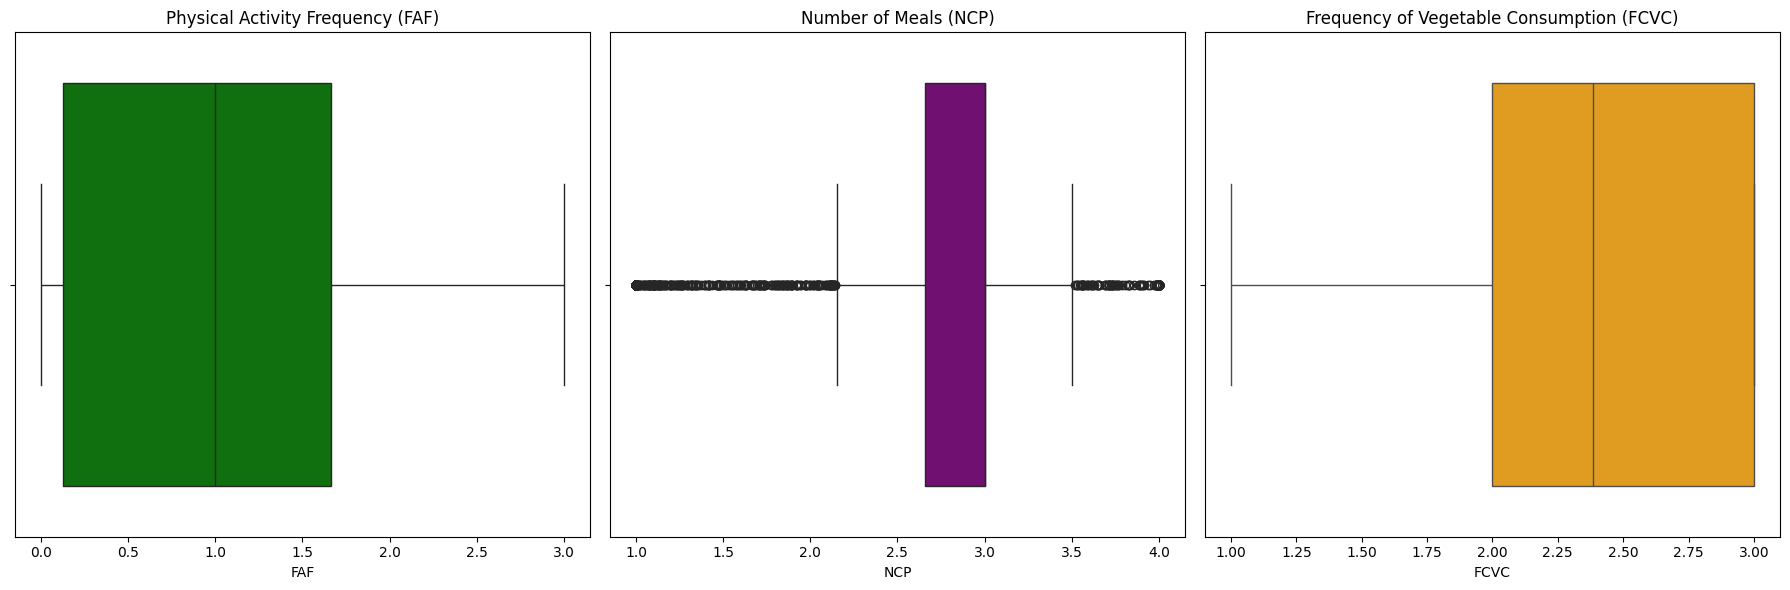

In [ ]:
# Create a figure with a specified size

plt.figure(figsize=(18, 6))

# Create the first subplot for physical activity frequency distribution

plt.subplot(1, 3, 1) # 1 row, 3 columns, first subplot
sns.boxplot(x='FAF', data=df, color='Green') # Box plot for 'FAF' variable with green color
plt.title('Physical Activity Frequency (FAF)') # Set the title for the first subplot

# Create the second subplot for number of meals distribution

plt.subplot(1, 3, 2) # 1 row, 3 columns, second subplot
sns.boxplot(x='NCP', data=df, color='Purple') # Box plot for 'NCP' variable with purple color
plt.title('Number of Meals (NCP)') # Set the title for the second subplot

# Create the third subplot for frequency of vegetable consumption distribution

plt.subplot(1, 3, 3) # 1 row, 3 columns, third subplot
sns.boxplot(x='FCVC', data=df, color='Orange') # Box plot for 'FCVC' variable with orange color
plt.title('Frequency of Vegetable Consumption (FCVC)') # Set the title for the third subplot

# Adjust the layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()


This visualization highlights the patterns of physical activity, meal frequency, and vegetable consumption among individuals. The majority engage in physical activity infrequently, as indicated by the concentration of values in the lower range, while meal frequency is mostly consistent, with most individuals consuming around two to three meals daily, though some outliers consume more. Vegetable consumption is predominantly high, suggesting a healthy dietary pattern with frequent vegetable intake. These trends indicate a balanced lifestyle for many individuals, though physical activity levels appear lower overall compared to dietary habits.

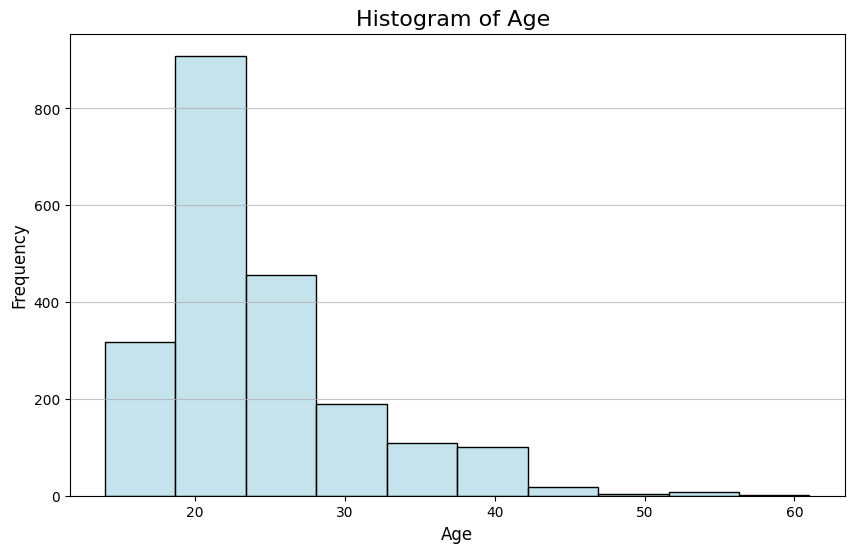

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=10, color='lightblue', alpha=0.7)
plt.title('Histogram of Age ', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', alpha=0.75)
plt.show()

this Histogram indicates the ages of individuals, we noticed that the most age frequency is in 20s this suggests that the majority of individuals in the dataset fall within this age, Other age ranges, may have shorter bars, reflecting fewer individuals

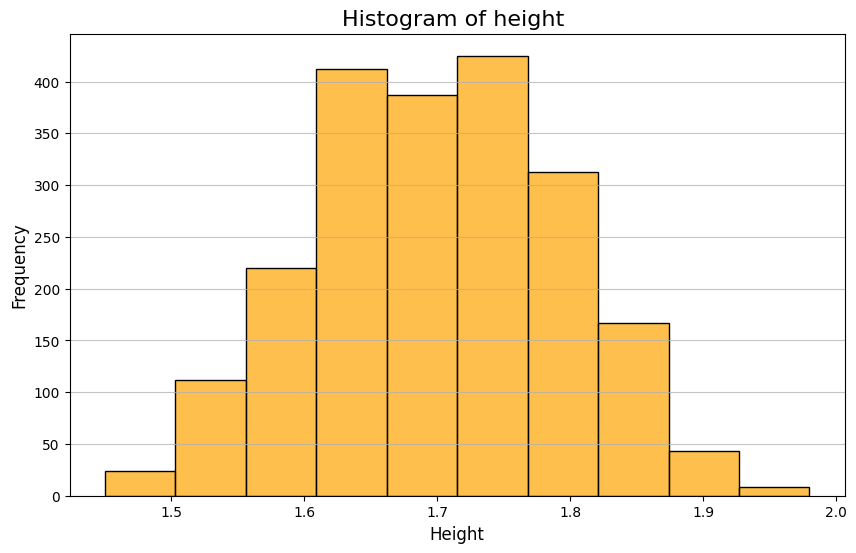

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Height'], bins=10, color='orange', alpha=0.7)
plt.title('Histogram of height ', fontsize=16)
plt.xlabel('Height', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', alpha=0.75)
plt.show()

this Histogram indicates the Height of individuals, we noticed that the most Height frequency is in between 1.6 and 1.8 this suggests that the majority of individuals in the dataset fall within this Height, Other Height , may have shorter bars, which reflecting fewer Height


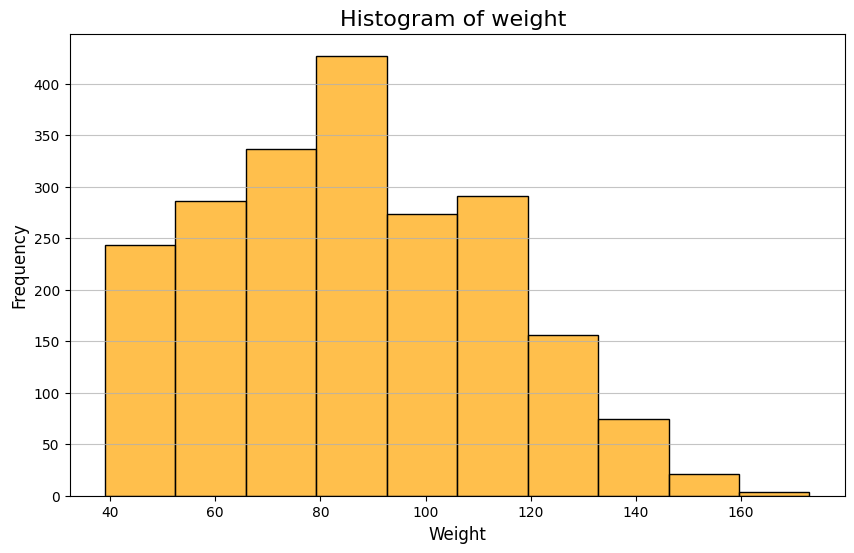

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Weight'], bins=10, color='orange', alpha=0.7)
plt.title('Histogram of weight ', fontsize=16)
plt.xlabel('Weight', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', alpha=0.75)
plt.show()

this Histogram indicates the Weight of individuals, we noticed that the most Weight frequency is in between 60 and almost 100 this suggests that the majority of individuals in the dataset fall within between this weight, Other weights , may have shorter bars, which reflecting fewer weight




---



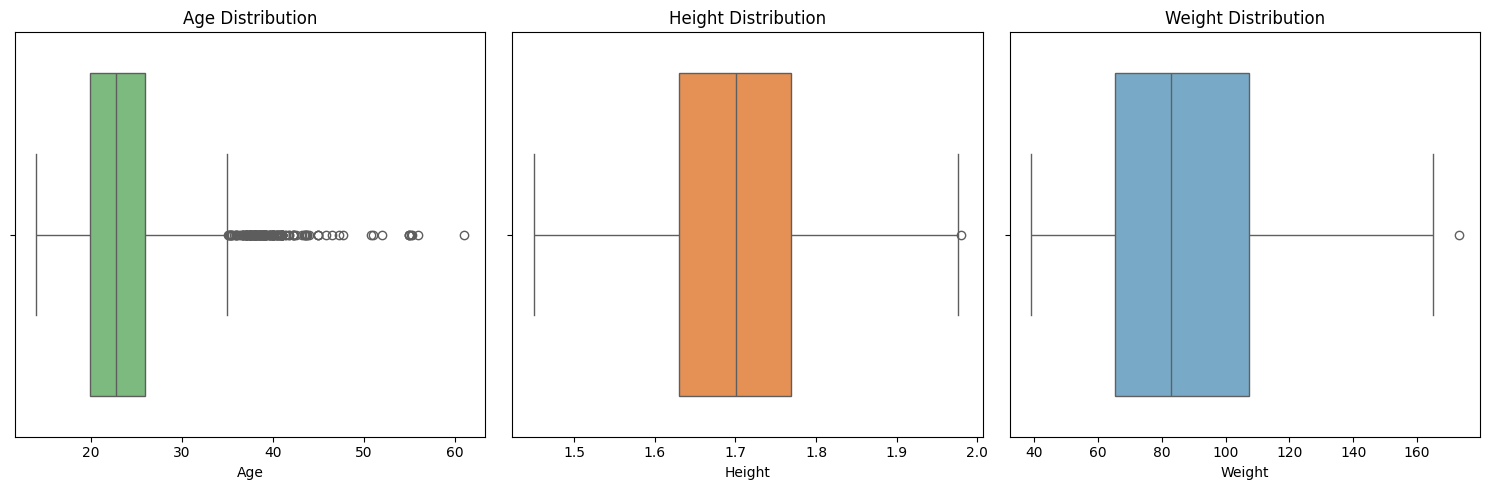

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x='Age', data=df, palette='Greens')
plt.title('Age Distribution')


plt.subplot(1, 3, 2)
sns.boxplot(x='Height', data=df, palette='Oranges')
plt.title('Height Distribution')


plt.subplot(1, 3, 3)
sns.boxplot(x='Weight', data=df, palette='Blues')
plt.title('Weight Distribution')

plt.tight_layout()
plt.show()

Age Distribution is mostly consistent with most individuals ages between 20 to almost 30, and theres some outliers, the Height Distribution consist between 1.6 to almost 1.8, while the weight distribution between 60 to almost 120, although theres outliers.

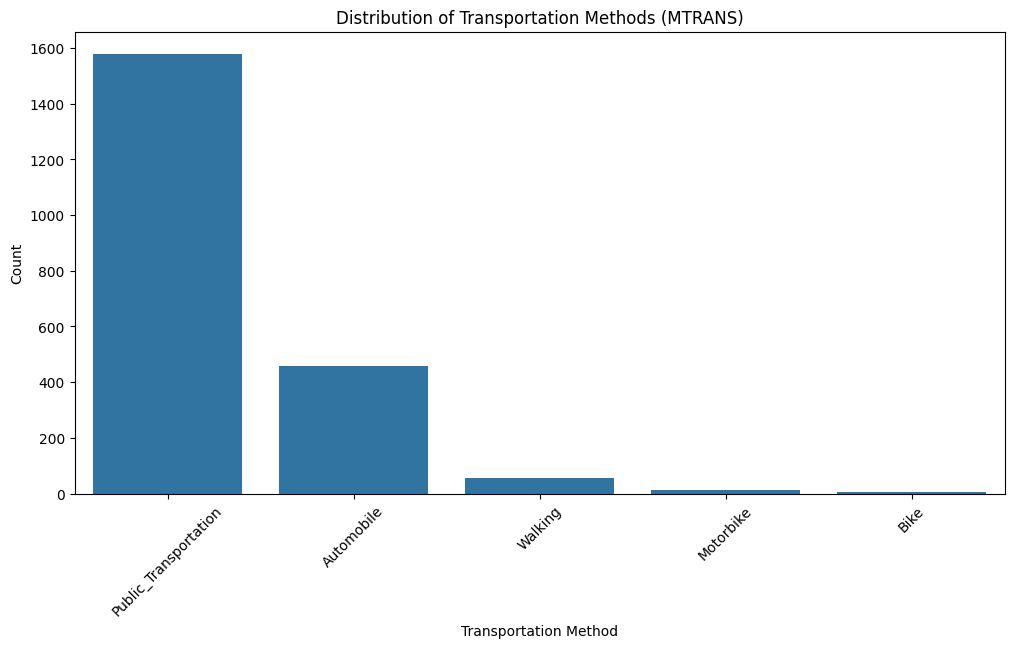

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='MTRANS', data=df, order=df['MTRANS'].value_counts().index)
plt.title('Distribution of Transportation Methods (MTRANS)')
plt.xlabel('Transportation Method')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

The graph illustrates the frequency of various transportation modes used by individuals. Public transport is the most frequently used option, with a count of just under 1600, indicated by the tallest bar. Cars are the second most common choice but at a significantly lower count. Walking is less frequent, while motorcycles and bicycles have the lowest usage among the surveyed group. Overall, the data highlights a strong preference for public transportation, such as buses and trains, over other methods like automobiles, walking, motorcycles, and biking.

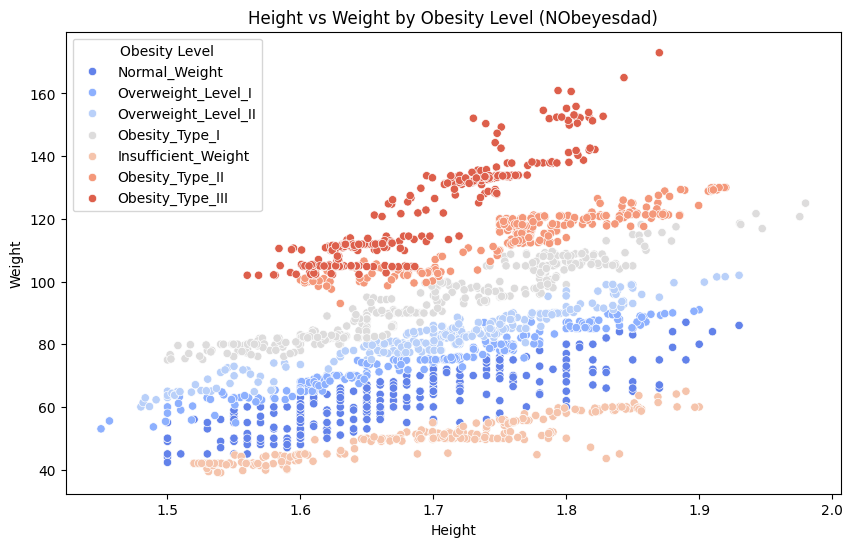

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Height', y= 'Weight', hue='NObeyesdad', palette='coolwarm')
plt.title('Height vs Weight by Obesity Level (NObeyesdad)')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.legend(title='Obesity Level')
plt.show()

The plot gives a clear visual separation of obesity levels based on weight, though height has some influence. In general, weight is a stronger predictor of obesity level. The distinct clusters for extreme obesity levels, combined with some overlap in the lower levels, highlight the complexity of predicting obesity levels using just height and weight.

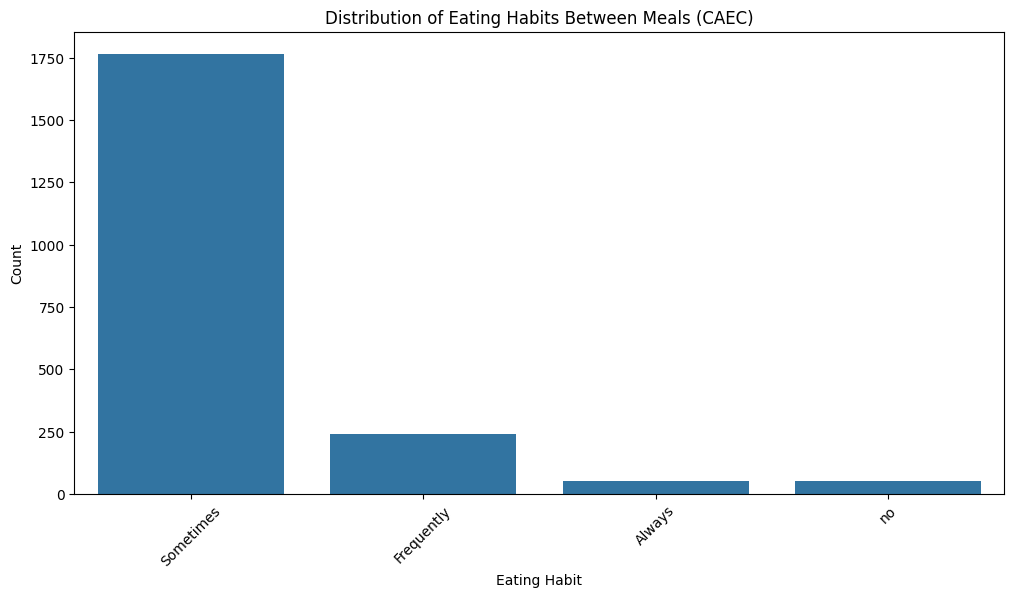

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='CAEC', data=df, order=df['CAEC'].value_counts().index)
plt.title('Distribution of Eating Habits Between Meals (CAEC)')
plt.xlabel('Eating Habit')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

The bar chart illustrates the frequency of different eating habits reported by individuals, the chart reveals that eating between meals is a common behavior, with "sometimes" being the most reported frequency. The other categories show decreasing levels of frequency, suggesting that while snacking occurs, consistent habits are less common.

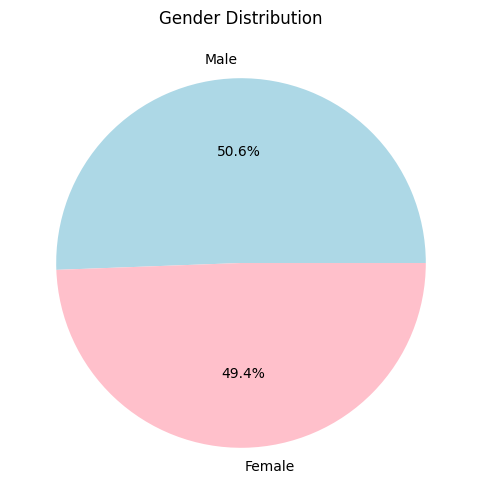

In [ ]:
gender_counts = df['Gender'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['lightblue', 'pink'])
plt.title('Gender Distribution')
plt.show()

The graph indicates that there is approximately an equal gender distribution of males and females in the data set.

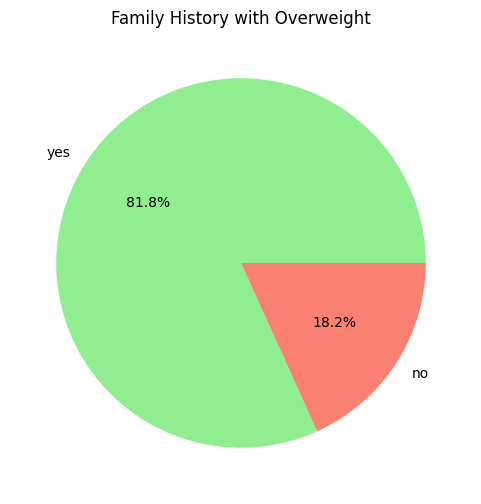

In [ ]:
family_history_counts = df['family_history_with_overweight'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(family_history_counts, labels=family_history_counts.index, autopct='%1.1f%%', colors=['lightgreen', 'salmon'])
plt.title('Family History with Overweight')
plt.show()

According to the graph, the majority of people have a family history of being overweight, while a smaller percentage do not. This suggests that family history may be a significant factor influencing obesity levels.

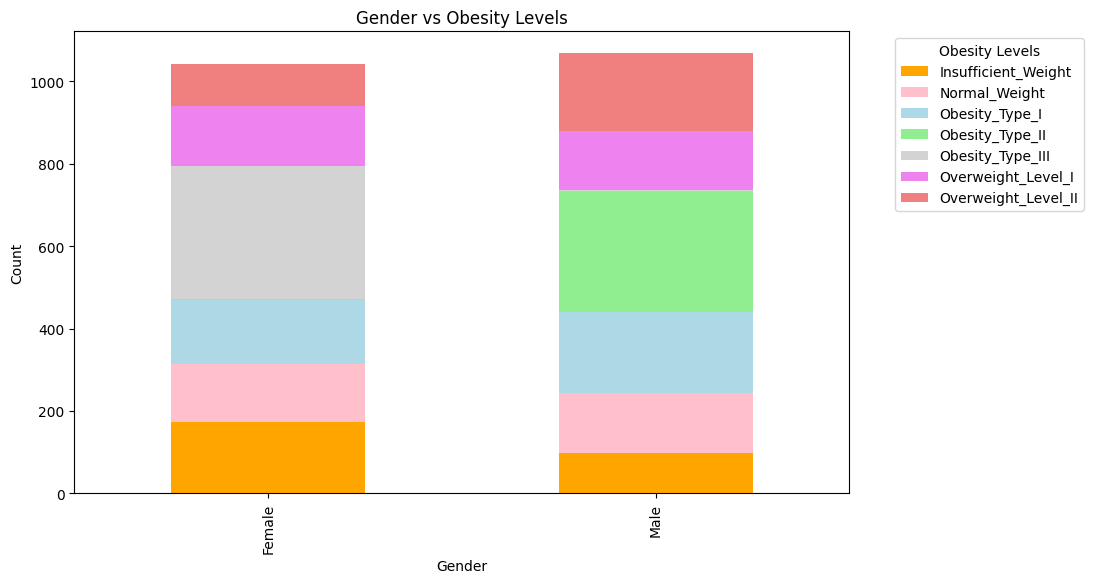

In [ ]:
gender_obesity = df.groupby(['Gender', 'NObeyesdad']).size().unstack()
gender_obesity.plot(kind='bar', stacked=True, figsize=(10, 6), color=['orange', 'pink', 'lightblue', 'lightgreen', 'lightgray', 'violet', 'lightcoral'])
plt.title('Gender vs Obesity Levels')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Obesity Levels', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

From the graph,we observe that Males have a higher percentage of Obesity Type II, while females have a higher percentage of Obesity Type III. However, for the other types, both genders are similar.


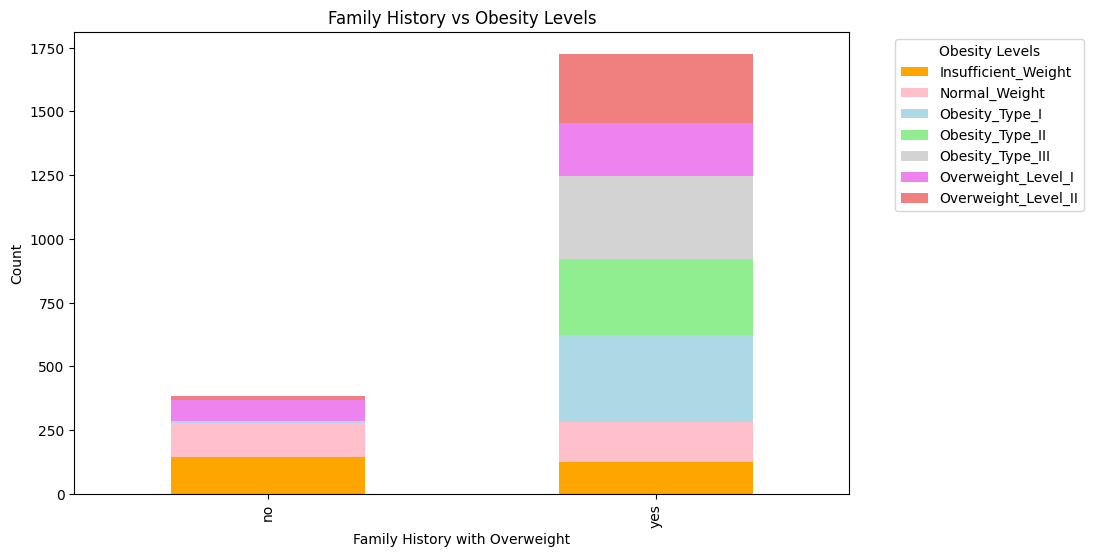

In [ ]:
family_obesity = df.groupby(['family_history_with_overweight', 'NObeyesdad']).size().unstack()
family_obesity.plot(kind='bar', stacked=True, figsize=(10, 6), color=['orange', 'pink', 'lightblue', 'lightgreen', 'lightgray', 'violet', 'lightcoral'])
plt.title('Family History vs Obesity Levels')
plt.xlabel('Family History with Overweight')
plt.ylabel('Count')
plt.legend(title='Obesity Levels', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

The graph shows that people with a family history of being overweight tend to have higher obesity levels compared to those without history.

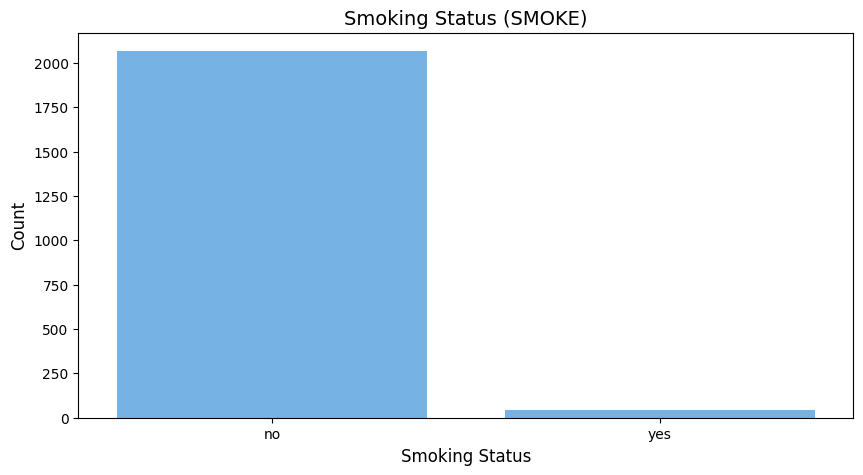

In [ ]:
# bar chart for SMOKE (Smoking status)
plt.figure(figsize=(10, 5))
sns.countplot(x='SMOKE', data=df, color='#64B5F6')
plt.title('Smoking Status (SMOKE)', fontsize=14)
plt.xlabel('Smoking Status', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.show()

From this graph, we observe that the 'Yes' smoking status is relatively rare among the individuals in the dataset compared to 'No.' This indicates that a significant number of individuals do not smoke, suggesting that smoking status may not be a suitable variable for classification purposes in this dataset.

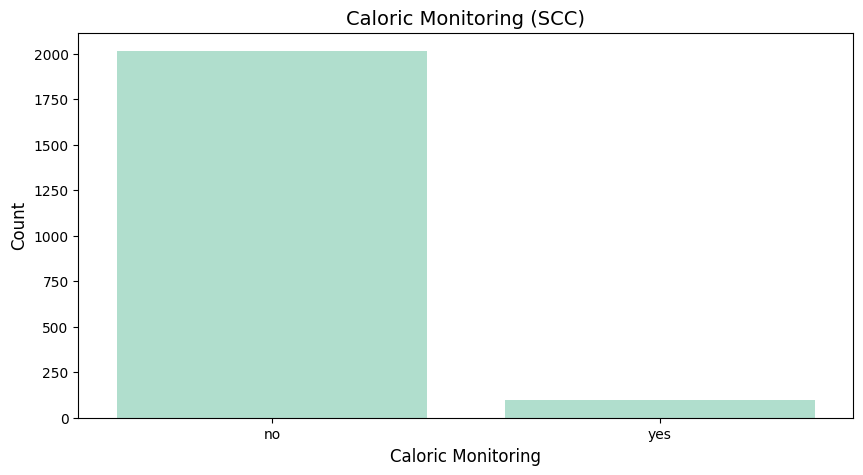

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(x='SCC', data=df, color ='#A8E6CF')
plt.title('Caloric Monitoring (SCC)', fontsize=14)
plt.xlabel('Caloric Monitoring', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

From this graph, we observe that it is quite rare for individuals in the dataset to monitor their calorie intake. Therefore, this attribute may not be suitable for classification purposes.

(2.0, 448)


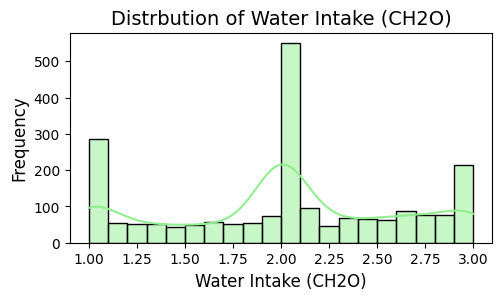

In [ ]:
# Histogram for CH2O (Water Intake)
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.histplot(df['CH2O'], bins=20, kde=True, color='lightgreen')
plt.title('Distrbution of Water Intake (CH2O)', fontsize=14)
plt.xlabel('Water Intake (CH2O)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
print(highest_frequency_value(df,'CH2O'))


This histogram indicates that individuals in the dataset tend to have specific preferred levels of water intake, with most clustered around the value of 2. Which suggest that individuals in the dataset are generally aware of hydration needs.

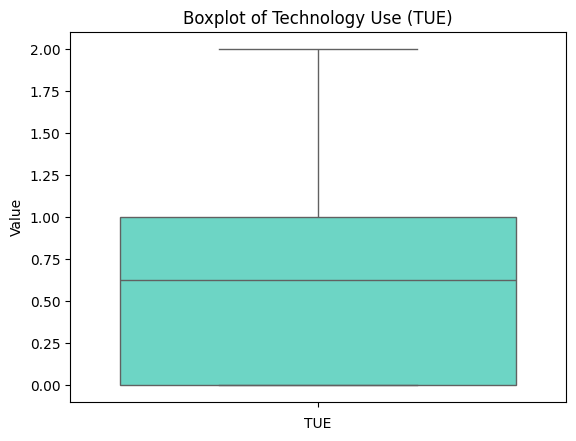

In [ ]:
sns.boxplot(df['TUE'], patch_artist=True, color='#5ce6d1' )
plt.title('Boxplot of Technology Use (TUE)')
plt.xlabel('TUE')
plt.ylabel('Value')

plt.show()

From this boxplot, we noticed that there are no outliers in terms of technology use. Additionally, individuals in the dataset tend to use technology less frequently.

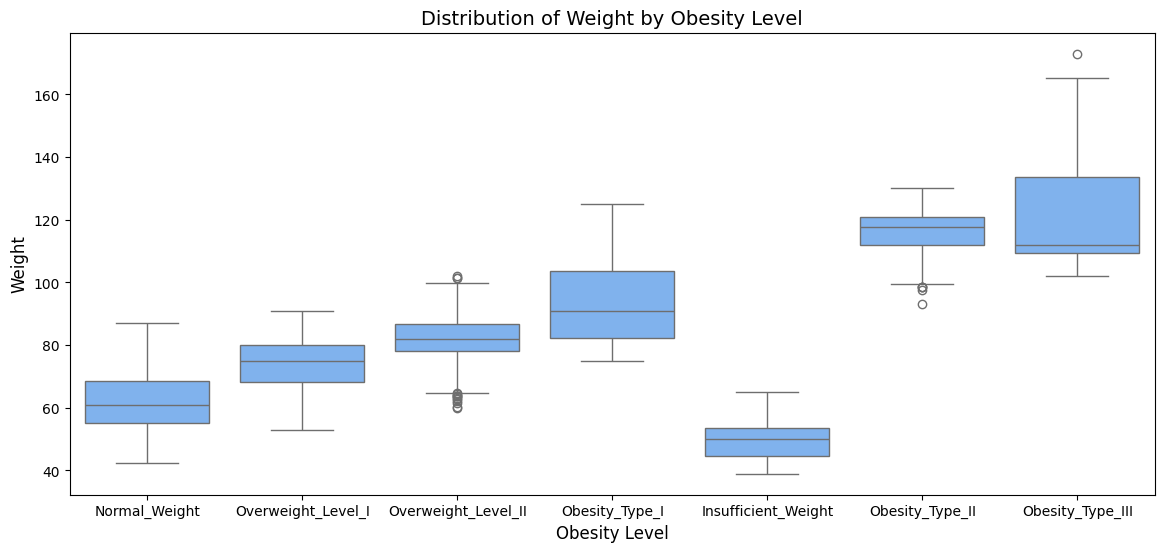

In [ ]:
plt.figure(figsize=(14, 6))
sns.boxplot(x='NObeyesdad', y='Weight', data=df, color = '#6eb1ff')

plt.title('Distribution of Weight by Obesity Level', fontsize=14)
plt.xlabel('Obesity Level', fontsize=12)
plt.ylabel('Weight', fontsize=12)

plt.show()

From the graph we noticed that as the obesity level increases, so does the median weight and the variability of weights within each category. Higher obesity levels (Type I, II, and III) exhibit larger ranges of weight, suggesting more diversity in the weight of individuals at these obesity levels. Conversely, insufficient and normal weight categories have tighter distributions with lower overall values.

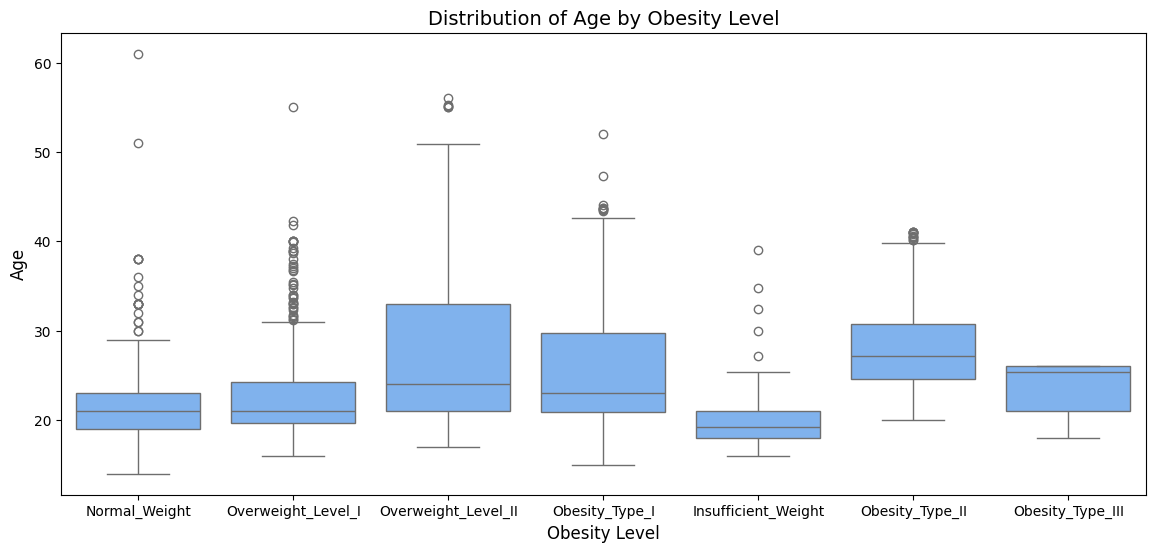

In [ ]:
plt.figure(figsize=(14, 6))
sns.boxplot(x='NObeyesdad', y='Age', data=df, color='#6eb1ff')

plt.title('Distribution of Age by Obesity Level', fontsize=14)
plt.xlabel('Obesity Level', fontsize=12)
plt.ylabel('Age', fontsize=12)

plt.show()

From the graph, we observe that middle-aged individuals are more likely to be overweight, although there are some exceptions. Notably, individuals classified as Obesity Type III tend to be primarily in their 20s and close to 30 years old. Additionally, most individuals with normal weight are typically under 30 years old; however, there are some outliers present in this group.

In [ ]:
#Check for dublicates
df.duplicated().sum()


24

In [ ]:
#remove dublicates
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

### **Central Tendency Measures For the Numerical Variables :**


In [ ]:
# Central Tendency Measures For Numerical Variables
numericalVariables = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O']

for i in range(len(numericalVariables)):
    column = numericalVariables[i]
    mean_value = round(df[column].mean(), 3)
    variance_value = round(df[column].var(), 3)
    max_value = df[column].max()
    print(f"{column} - Mean: {mean_value}, Variance: {variance_value}, Maximum: {max_value} ")


Age - Mean: 24.353, Variance: 40.562, Maximum: 61.0 
Height - Mean: 1.703, Variance: 0.009, Maximum: 1.98 
Weight - Mean: 86.859, Variance: 685.96, Maximum: 173.0 
FCVC - Mean: 2.421, Variance: 0.286, Maximum: 3.0 
NCP - Mean: 2.701, Variance: 0.585, Maximum: 4.0 
CH2O - Mean: 2.005, Variance: 0.37, Maximum: 3.0 


### Age:
- The mean age of individuals in the dataset is around 24 years, but the variance is relatively high, indicating a diverse age range and the potential presence of outliers.

### Height:
- The mean height of individuals in the dataset is approximately 1.7 meters, with very low variance, suggesting that the height distribution is quite consistent across the sample.

### Weight:
- The average weight is about 86.6 kg, but the variance is very high. This indicates that there’s a significant variation in weight among individuals in the dataset.

### FCVC (Frequency of Vegetable Consumption):
- The mean of the frequency of vegetable consumption for individuals in the dataset is relatively high and close to the maximum, but there is some variation in Vegetable Consumption among them.

### NCP (Number of Main Meals):
- Most participants consume around 3 meals a day, with some variation, likely reflecting different eating patterns or cultural habits.

### CH2O (Water Consumption):
- The average water consumption is around the midpoint, suggesting moderate water intake, with some variability among participants.


In [ ]:
# Loop through each column in the dataframe and calculate the mode and its count
for column in df.columns:
    mode_value = df[column].mode()[0]
    mode_count = df[column].value_counts()[mode_value]
    print(f"{column} - Mode: {mode_value} - Count: {mode_count}")


Age - Mode: 18.0 - Count: 128
Gender - Mode: Male - Count: 1068
Height - Mode: 1.7 - Count: 60
Weight - Mode: 80.0 - Count: 59
CALC - Mode: Sometimes - Count: 1401
FAVC - Mode: yes - Count: 1866
FCVC - Mode: 3.0 - Count: 652
NCP - Mode: 3.0 - Count: 1203
SCC - Mode: no - Count: 2015
SMOKE - Mode: no - Count: 2067
CH2O - Mode: 2.0 - Count: 448
family_history_with_overweight - Mode: yes - Count: 1726
FAF - Mode: 0.0 - Count: 411
TUE - Mode: 0.0 - Count: 557
CAEC - Mode: Sometimes - Count: 1765
MTRANS - Mode: Public_Transportation - Count: 1580
NObeyesdad - Mode: Obesity_Type_I - Count: 351


The mode analysis of the obesity dataset reveals key demographic trends, with a predominance of males (1,068) and young adults (age 18.0 with 128 counts). Most individuals report "sometimes" monitoring calories (1,401) and have a family history of overweight (1,726). A significant number do not smoke (2,067) and typically use public transportation (1,580). The most common height is 1.7 m (60 counts) and the average weight is 80.0 kg (59 counts). The dominant obesity classification is Obesity_Type_I (351), indicating prevalent health concerns within this population.

### **Outliers**

Age Outliers:
             Age  Gender    Height      Weight        CALC FAVC      FCVC  \
13    41.000000    Male  1.800000   99.000000  Frequently  yes  2.000000   
21    52.000000  Female  1.690000   87.000000          no  yes  3.000000   
33    39.000000    Male  1.790000   90.000000   Sometimes   no  2.000000   
92    55.000000    Male  1.780000   84.000000  Frequently   no  3.000000   
104   38.000000  Female  1.560000   80.000000   Sometimes  yes  2.000000   
...         ...     ...       ...         ...         ...  ...       ...   
1740  37.765356    Male  1.763582  117.861590   Sometimes  yes  2.145114   
1775  37.207082    Male  1.762921  118.401740   Sometimes  yes  2.136830   
1776  38.108940    Male  1.752863  119.201465   Sometimes  yes  2.499388   
1777  38.644441    Male  1.768235  117.792268   Sometimes  yes  2.230742   
1778  38.112989    Male  1.766888  118.134898   Sometimes  yes  2.240757   

           NCP  SCC SMOKE      CH2O family_history_with_overweight      

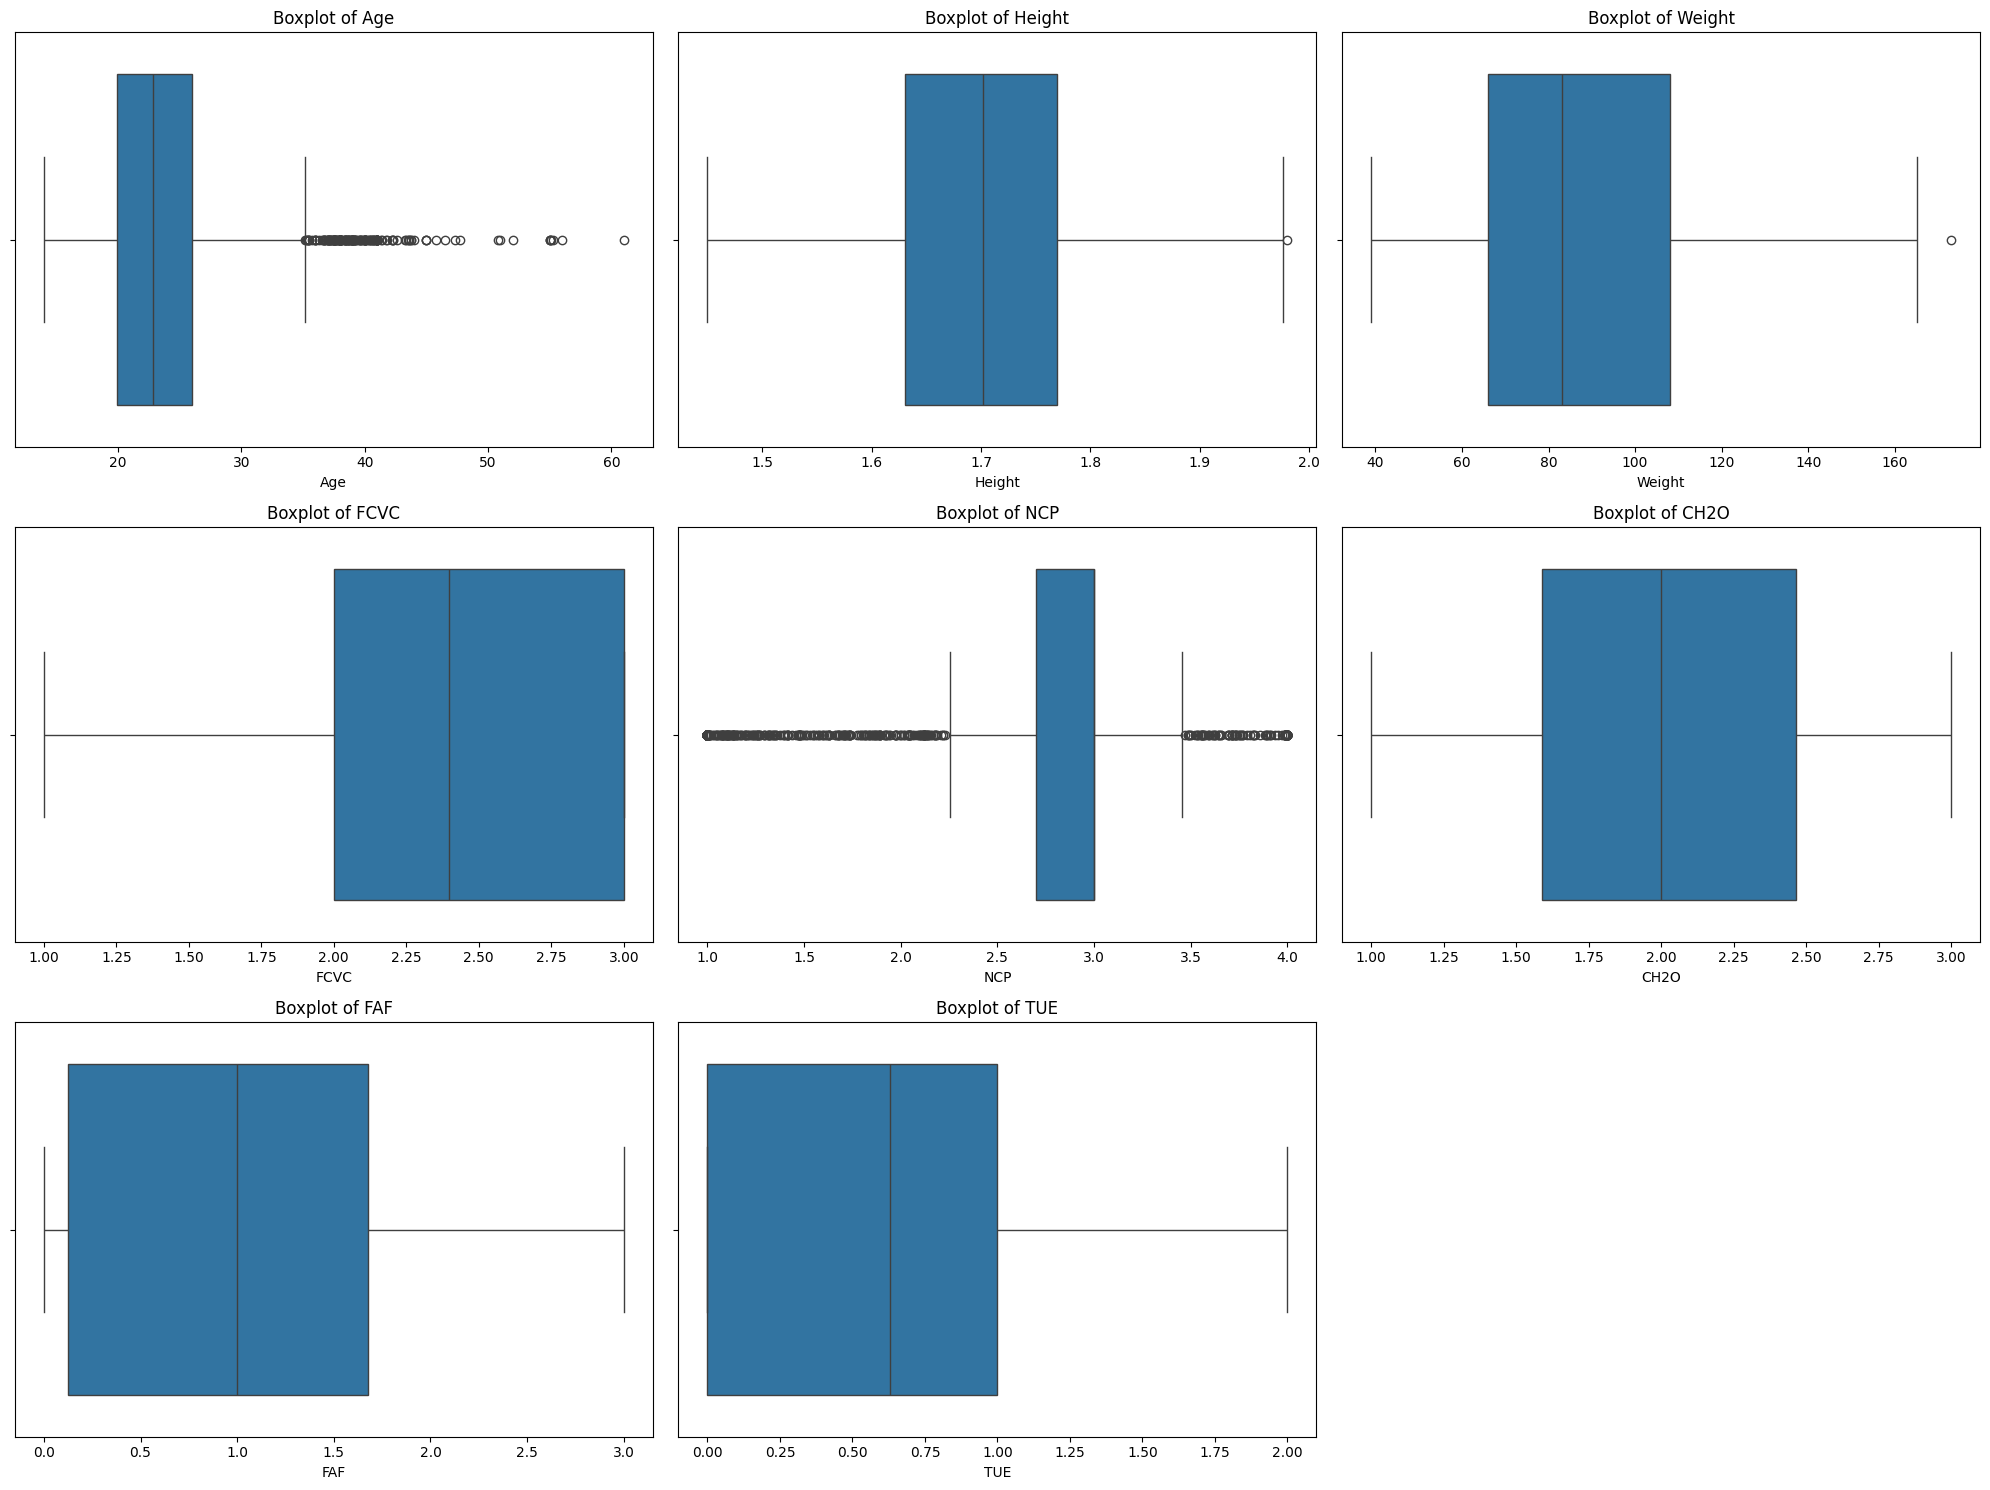

In [ ]:
# Function to detect outliers using the IQR method
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Automatically identify all numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Dictionary to hold outlier data
outliers_dict = {}

# Identify outliers for each numerical column
for col in numerical_columns:
    outliers_dict[col] = detect_outliers_iqr(df, col)

# Display outliers for all numerical columns
for col, outliers in outliers_dict.items():
    print(f"{col} Outliers:\n", outliers, "\n")

# Visualize the outliers using boxplots for each numerical column
plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)  # Adjust subplot grid size as needed
    sns.boxplot(x=df[col])  # Boxplot for the current column
    plt.title(f'Boxplot of {col}')  # Title for the current plot
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()  # Display the plots


## Outlier Analysis

In our analysis, we identified several outliers in the dataset based on the following features: Age, Height, Weight, and NCP (Number of Main Meals). Each of these features plays a significant role in understanding the obesity-related behaviors and characteristics of individuals in the dataset.

1. **Age**:
   - The identified age outliers ranged from 37 to 55 years. These values fall within a reasonable range for an adult population and reflect a diversity of age that is relevant to studying obesity. Hence, we opted not to remove these entries as they contribute to a more comprehensive understanding of the age distribution within our dataset.

2. **Height**:
   - The outlier height of 1.98 meters may seem high; however, it is not uncommon in certain populations, particularly among taller individuals. This value may represent valid data, indicating the importance of including individuals with varied physical characteristics in our analysis.

3. **Weight**:
   - We observed an extreme weight of 173 kg, which could be indicative of individuals within the obesity spectrum. Rather than dismissing this entry as an outlier, we recognize it as a critical representation of the demographic we are studying. Removing such values could result in a loss of vital insights regarding weight distribution in the context of obesity.

4. **NCP (Number of Main Meals)**:
   - The outliers in NCP suggest individuals reporting an extremely low (1 meal) or high (4 meals) frequency. These records may represent valid dietary habits that could impact obesity rates. Given the diverse eating patterns in different cultures and populations, we decided to retain these entries to reflect the full range of dietary behaviors.

## Conclusion
After careful consideration, we determined that the identified outliers in our dataset are valid and reflective of real-world scenarios. Removing them could lead to an inaccurate portrayal of the population under study. Therefore, we retained these entries in our analysis to ensure that our conclusions and insights are comprehensive and representative of the diverse factors contributing to obesity.


### **Missing values**

In [ ]:

# Check for missing values
missing_values = df.isna().sum()
print("\nMissing Values in each column:")
print(missing_values)

#total number of missing value in the dataset
print("\nTotal number of missimg value in the dataset:" , missing_values.sum())

# Display the first few rows of the updated dataset
print("\nUpdated Data:")
print(df.head())


Missing Values in each column:
Age                               0
Gender                            0
Height                            0
Weight                            0
CALC                              0
FAVC                              0
FCVC                              0
NCP                               0
SCC                               0
SMOKE                             0
CH2O                              0
family_history_with_overweight    0
FAF                               0
TUE                               0
CAEC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

Total number of missimg value in the dataset: 0

Updated Data:
    Age  Gender  Height  Weight        CALC FAVC  FCVC  NCP  SCC SMOKE  CH2O  \
0  21.0  Female    1.62    64.0          no   no   2.0  3.0   no    no   2.0   
1  21.0  Female    1.52    56.0   Sometimes   no   3.0  3.0  yes   yes   3.0   
2  23.0    Male    1.80    77.0  Freque

No Missing Values:

The analysis shows that there are no missing values in any of the columns of the dataset, as indicated by the (missing_values.sum()) which equals 0. This is a positive finding because missing data can lead to inaccurate analyses and biases in results.

### **Discretization**

In [ ]:

# Select the 'Age' column for discretization
age_column = df['Age']

# Define the bin edges for the discretization process
bins = [0, 18, 30, 45, 60, 100]

# Define the labels for the bins
labels = ['Child', 'Young Adult', 'Adult', 'Middle Age', 'Senior']

# Apply the discretization
df['Age Group'] = pd.cut(age_column, bins=bins, labels=labels, right=False)

# Display the DataFrame with the new 'Age Group' column
print("\nDataFrame with the new 'Age Group' column:")
print(df[['Age', 'Age Group']].head())



DataFrame with the new 'Age Group' column:
    Age    Age Group
0  21.0  Young Adult
1  21.0  Young Adult
2  23.0  Young Adult
3  27.0  Young Adult
4  22.0  Young Adult


The age values have been grouped into five categories: 'Child' (0-18), 'Young Adult' (18-30), 'Adult' (30-45), 'Middle Age' (45-60), and 'Senior' (60-100).

**why Discretization ?**
When looking at obesity levels, we don’t always need the exact age. Grouping people into these larger age ranges helps us better see patterns and trends. It also makes it easier to compare different age groups and understand how obesity affects each group.

### **Normalization**

In [ ]:

#  Select the numerical columns that need normalization
numerical_columns = [ 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

# Initialize the Min-Max Scaler
# Min-Max scaling brings all values into the range [0, 1]
scaler = MinMaxScaler()

#  Apply normalization to the selected numerical columns
# We create a copy of the dataset to keep the original data unchanged and apply the scaler
normalized_data = df.copy()  # Copy the original data to avoid overwriting it
normalized_data[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Compare original vs normalized data
print("\nOriginal Data (Numerical Columns):")
print(df[numerical_columns].head())  # Show the original data

print("\nNormalized Data (Numerical Columns):")
print(normalized_data[numerical_columns].head())  # Show the normalized data


# - Min-Max scaling ensures that each numerical column is on the same scale (0 to 1) i try to gorget out


Original Data (Numerical Columns):
   Height  Weight  FCVC  NCP  CH2O  FAF  TUE
0    1.62    64.0   2.0  3.0   2.0  0.0  1.0
1    1.52    56.0   3.0  3.0   3.0  3.0  0.0
2    1.80    77.0   2.0  3.0   2.0  2.0  1.0
3    1.80    87.0   3.0  3.0   2.0  2.0  0.0
4    1.78    89.8   2.0  1.0   2.0  0.0  0.0

Normalized Data (Numerical Columns):
     Height    Weight  FCVC       NCP  CH2O       FAF  TUE
0  0.320755  0.186567   0.5  0.666667   0.5  0.000000  0.5
1  0.132075  0.126866   1.0  0.666667   1.0  1.000000  0.0
2  0.660377  0.283582   0.5  0.666667   0.5  0.666667  0.5
3  0.660377  0.358209   1.0  0.666667   0.5  0.666667  0.0
4  0.622642  0.379104   0.5  0.000000   0.5  0.000000  0.0


 **Normalization** is generally preferred over discretization for numerical columns like Height, Weight, FCVC , and NCP for several key reasons. First, normalization preserves the relative relationships between values, which helps machine learning models achieve better performance, while discretization can lead to a loss of important information. Second, normalization allows data to be used as continuous variables, which is essential for algorithms that rely on distances. Although age could be normalized, it may not have been included in this analysis because, when looking at obesity levels, we don’t always need the exact age. Grouping people into larger age ranges helps us better see patterns and trends, making it easier to compare different age groups and understand how obesity affects each group.

**Why Use Min-Max Normalization?**

**Different Scales**: The numerical features in our dataset are measured on different scales. For example, age is in years, height is in meters, and weight is in kilograms. Because of this, some features may have a bigger impact on the model than others.

**Equal Contribution**: Min-Max normalization changes all features to be on the same scale, usually between 0 and 1. This way, every feature has an equal say in how the model learns, which helps it perform better.

**Better Model Performance**: Normalizing the features helps the model learn more effectively. When all features are treated equally, the model can make better predictions.



 **When we apply Min-Max normalization to the dataset, several important changes happen:**

**Consistent Range for Numbers**:

Before Normalization: Numbers like , Height, and Weight have different ranges.
For example:

Height: measured in meters, from 1.4 to 2.0.
Weight: can vary from 40 to over 100 kg.
After Normalization: All these values are adjusted to fit between 0 and 1. This makes it easier for some algorithms, to work with the data.

**Balanced Contribution of Variables**:

 Before Normalization : Variables with a larger range, like Weight and Height, can have a bigger effect on the model, especially in distance-based algorithms. This might cause the model to focus too much on these variables when comparing data points.

After Normalization: All variables are treated equally since they are now on the same scale. This prevents any one variable from dominating due to its original range.

**Outlier Sensitivity**:

Before Normalization: Outliers, like very high weight, can affect the model's performance if they are not addressed.

After Normalization: The impact of outliers is still there but less noticeable.

 Min-Max scaling is still affected by extreme values since the range is based on the minimum and maximum values. If outliers exist, most of the data could be compressed into a smaller range.



### **wrapper feature selection**

In [ ]:

# Encode categorical variables, including the target 'NObeyesdad'
label_encoder = LabelEncoder()
df_encoded = df.copy()
for col in df_encoded.select_dtypes(include=['object']).columns:
    df_encoded[col] = label_encoder.fit_transform(df_encoded[col])

# Additionally encode categorical columns with category dtype
category_columns = df_encoded.select_dtypes(include=['category']).columns.tolist()
for col in category_columns:
    df_encoded[col] = label_encoder.fit_transform(df_encoded[col])

# Separate features and target
X = df_encoded.drop('NObeyesdad', axis=1)
y = df_encoded['NObeyesdad']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- Recursive Feature Elimination (RFE) ---
print("\n--- Recursive Feature Elimination (RFE) ---")
model = LogisticRegression(max_iter=2000)  # Increase max_iter for convergence

# Apply RFE to select the top 10 features
rfe = RFE(model, n_features_to_select=10)
fit = rfe.fit(X_scaled, y)  # Fit on scaled data

# Identify selected and dropped features
selected_features = X.columns[fit.support_]
dropped_features = [col for col in X.columns if col not in selected_features]

# Log results
print(f"\nSelected Features (RFE): {selected_features.tolist()}")
print(f"Features Dropped (RFE): {dropped_features}")

# Create a new DataFrame with the selected features
df_reduced_rfe = df[selected_features.tolist() + ['NObeyesdad']]
print("\nReduced DataFrame (RFE):")
print(df_reduced_rfe.head())



--- Recursive Feature Elimination (RFE) ---

Selected Features (RFE): ['Age', 'Gender', 'Height', 'Weight', 'FCVC', 'NCP', 'family_history_with_overweight', 'FAF', 'MTRANS', 'Age Group']
Features Dropped (RFE): ['CALC', 'FAVC', 'SCC', 'SMOKE', 'CH2O', 'TUE', 'CAEC']

Reduced DataFrame (RFE):
    Age  Gender  Height  Weight  FCVC  NCP family_history_with_overweight  \
0  21.0  Female    1.62    64.0   2.0  3.0                            yes   
1  21.0  Female    1.52    56.0   3.0  3.0                            yes   
2  23.0    Male    1.80    77.0   2.0  3.0                            yes   
3  27.0    Male    1.80    87.0   3.0  3.0                             no   
4  22.0    Male    1.78    89.8   2.0  1.0                             no   

   FAF                 MTRANS    Age Group           NObeyesdad  
0  0.0  Public_Transportation  Young Adult        Normal_Weight  
1  3.0  Public_Transportation  Young Adult        Normal_Weight  
2  2.0  Public_Transportation  Young Adult   


the wrapper method ranks features based on their importance in a predictive model (Logistic Regression). Instead of selecting features purely based on statistical metrics like correlation, it selects them based on their contribution to the actual prediction of the target variable (NObeyesdad—obesity levels). The dropped features, while potentially relevant in different contexts, may not provide additional value in predicting obesity given the features that were selected.

Selected Features:

 Based on RFE, age, gender, physical attributes (height, weight), meal habits (FCVC, NCP), family history of overweight, and physical activity were selected as the most important factors influencing obesity levels.

The inclusion of the MTRANS (mode of transport) and Age Group suggests that lifestyle choices and the categorization of age ranges also play a role in predicting obesity levels.

Dropped Features:

 RFE suggests that alcohol consumption, calorie monitoring, smoking, water consumption, and technology usage were not as impactful for predicting obesity levels.

This doesn't necessarily mean these factors don't influence obesity at all, but in the context of the model, they may either have redundant information or weaker associations compared to the selected features.